# Business Understanding
The Airbnb data contains listings of seattle, reviews, neighborhood data and availability of seattle. The calendar data contains prices on month basis.

1. What kind of rooms are mostly preferred?
2. How does the pricing trends differ between neighborhoods?
3. At what time of the year, the Airbnb prices are at its peak?
4. Which months have the highest count of listings throughout the year at seattle?
5. Maximum and minimum nights spend by people?

# Data Understanding
Lets look at the data

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b90e9ac8e79b4097bb1a20c7435fdd53 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='BhvzIxJZdWFsYBY9mNaYq_eFhOE-xQsPNFlVNhzk1j6f',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_b90e9ac8e79b4097bb1a20c7435fdd53.get_object(Bucket='machinelearningproject-donotdelete-pr-y1ucldkwaptpzk',Key='listings_Chicago.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,55,2,178,2019-12-15,2.72,1,316
1,4505,394 Great Reviews. 127 y/o House. 40 yds to tr...,5775,Craig & Kathleen,NaN,South Lawndale,41.85495,-87.69696,Entire home/apt,117,2,394,2020-02-16,2.88,1,220
2,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90289,-87.68182,Entire home/apt,80,2,384,2020-03-08,2.90,1,264
3,9811,Barbara's Hideaway - Old Town,33004,At Home Inn,NaN,Lincoln Park,41.91769,-87.63788,Entire home/apt,150,4,49,2019-10-23,0.66,10,315
4,10610,3 Comforts of Cooperative Living,2140,Lois,NaN,Hyde Park,41.79612,-87.59261,Private room,35,2,44,2020-02-14,0.65,5,269


# Cleaning Data
1. Checking if the neighborhood names are confusing or not.
2. Dropping columns with no records
3. Defining the mean function for later use.

In [4]:
#checking if neighborhood has messy names
df.neighbourhood.unique()

array(['Hyde Park', 'South Lawndale', 'West Town', 'Lincoln Park',
       'Logan Square', 'Near North Side', 'Uptown', 'North Center',
       'Lake View', 'Irving Park', 'Portage Park', 'Pullman',
       'Near South Side', 'West Ridge', 'Near West Side', 'Chatham',
       'Edgewater', 'Bridgeport', 'Woodlawn', 'Albany Park', 'Kenwood',
       'Douglas', 'Rogers Park', 'Lincoln Square', 'Grand Boulevard',
       'Forest Glen', 'Loop', 'Lower West Side', 'Humboldt Park',
       'East Garfield Park', 'North Lawndale', 'Oakland', 'Beverly',
       'Mckinley Park', 'Avondale', 'Norwood Park', 'Washington Park',
       'Morgan Park', 'Dunning', 'South Shore', 'Armour Square',
       'South Deering', 'Auburn Gresham', 'West Garfield Park', 'Hermosa',
       'Hegewisch', 'South Chicago', 'North Park', 'Jefferson Park',
       'West Elsdon', 'Austin', 'Ashburn', 'Belmont Cragin',
       'Greater Grand Crossing', 'Garfield Ridge', 'Brighton Park',
       'Archer Heights', 'Edison Park', 'West La

In [5]:
#droping columns with NaNs 
df.drop(['neighbourhood_group','last_review'], axis=1, inplace=True)

In [6]:
#filling the missing values with their means
fill_mean=lambda col: col.fillna(col.mean())

In [7]:
#replacing the NaNs in reviews_per_month columns with 0
df.fillna(0, inplace=True)
df[['reviews_per_month']] = df[['reviews_per_month']].astype(int)
df.tail()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
7884,43500660,Stylish 1 bedroom with car rental option (C-3),346927652,Scott,South Lawndale,41.84650,-87.72783,Entire home/apt,62,30,0,0,3,337
7885,43506345,Charming Condo in the heart of the City,7154891,Utku,Loop,41.88676,-87.61491,Entire home/apt,198,3,0,0,1,68
7886,43506959,4B1b Luxurious Stay - Two Bedroom Suite Chicago,22094147,Alexis & Bill,East Garfield Park,41.87774,-87.70218,Private room,120,1,0,0,10,362
7887,43514955,Sparkling Clean King and Queen Suite w Two Bat...,53964832,Jonathan,Lincoln Park,41.93076,-87.64480,Entire home/apt,150,2,0,0,4,364
7888,43518441,Private Bedroom Close to O’hare (2C),128265803,Victor,Norwood Park,41.99605,-87.79207,Private room,26,1,0,0,5,363


# Analyzing data
1. Creating a new df_chicago and extracting required columns from df.
2. Grouping. sorting and replacing nans with mean.
3. Checking out the neighborhood with high prices, availability and host listings.
4. Visualizing data.

In [8]:
#creating a subset of original dataframe for proper understanding
df_chicago=df[['neighbourhood', 'price', 'availability_365','number_of_reviews']]
df_chicago[['price','availability_365']].apply(fill_mean, axis=0)
df_chicago.head(10)

,neighbourhood,price,availability_365,number_of_reviews
0,Hyde Park,55,316,178
1,South Lawndale,117,220,394
2,West Town,80,264,384
3,Lincoln Park,150,315,49
4,Hyde Park,35,269,44
5,Lincoln Park,215,314,17
6,Lincoln Park,289,171,4
7,Lincoln Park,99,90,37
8,Lincoln Park,99,296,46
9,Logan Square,50,327,49


In [9]:
#rfinding out the neighborhood with high price, availability and number of reviews
df_group=df_chicago.groupby(['neighbourhood']).mean()
df_group= df_group.sort_values(['price', 'availability_365','number_of_reviews'], ascending=False, axis=0)
df_chi=df_group.head(5)
df_chi.reset_index()

,neighbourhood,price,availability_365,number_of_reviews
0,Near North Side,346.170012,184.906730,24.558442
1,Near South Side,253.225989,152.355932,23.903955
2,Lake View,220.555046,149.923547,48.233945
3,North Center,199.320988,169.975309,48.438272
4,Lincoln Park,199.029412,152.941176,50.470588


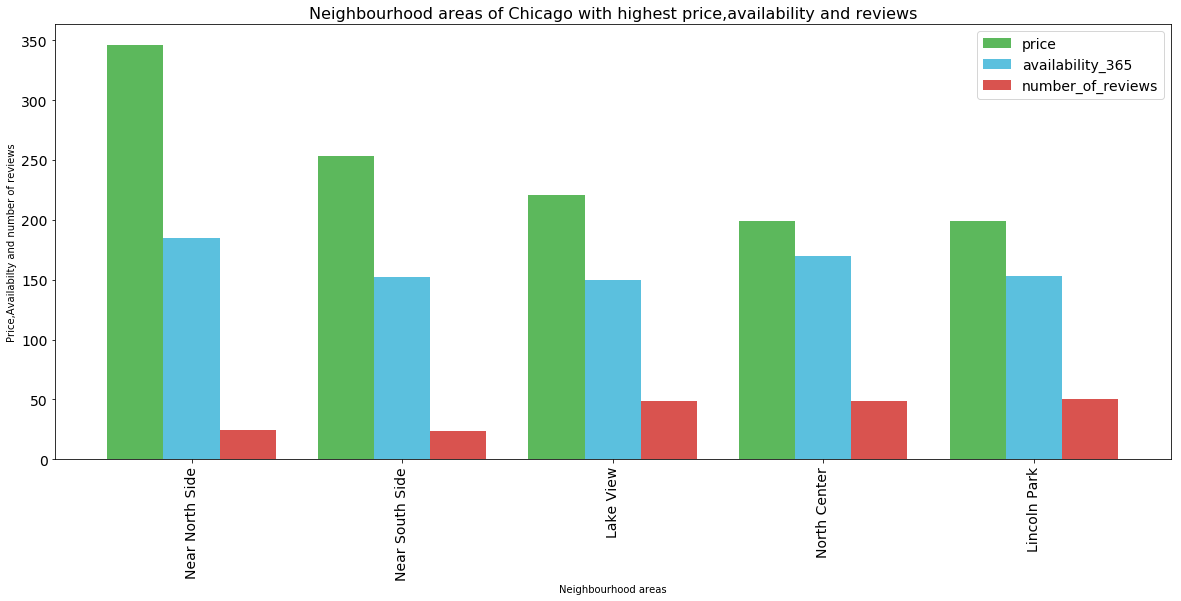

In [10]:
#plotting the above dataframe
ax = df_chi.plot(kind='bar', 
                figsize=(20, 8),
                rot=90,color = ['#5cb85c','#5bc0de','#d9534f'],
                width=.8,fontsize=14)
ax.set_title('Neighbourhood areas of Chicago with highest price,availability and reviews',fontsize=16)
ax.legend(fontsize=14,facecolor = 'white') 
ax.set_xlabel('Neighbourhood areas')
ax.set_ylabel('Price,Availabilty and number of reviews')
plt.show()

In [11]:
#finding out the neighborhood with highest calculated host listings count
df_new=df[['neighbourhood', 'calculated_host_listings_count']]
df_listings=df_new.groupby(['neighbourhood']).sum()
df_listings=df_listings.sort_values(['calculated_host_listings_count'], ascending=False, axis=0)
df_list=df_listings.head(10)
df_list

,calculated_host_listings_count
neighbourhood,
Near North Side,31589
Loop,28384
Near West Side,21068
Lake View,7390
West Town,6804
Near South Side,3743
Lincoln Park,3555
Logan Square,2986
Hyde Park,1670


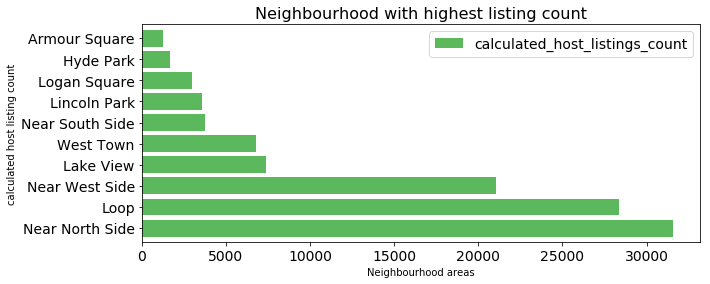

In [12]:
#plotting the above dataframe
ax = df_list.plot(kind='barh', 
                figsize=(10, 4),
                color = ['#5cb85c'],
                width=.8,fontsize=14)
ax.set_title('Neighbourhood with highest listing count',fontsize=16)
ax.legend(fontsize=14,facecolor = 'white') 
ax.set_xlabel('Neighbourhood areas')
ax.set_ylabel('calculated host listing count')
plt.show()

 1. Analysis of the room type with highest price.
 2. Using a heatmap to understand the price trends based on neighborhood and room types.

In [13]:
#calculating which room type makes more money
price_per_room_type = df.groupby(['room_type']).price.mean()
price_per_room_type

room_type
Entire home/apt    194.034760
Hotel room         261.306667
Private room       113.255211
Shared room         44.991071
Name: price, dtype: float64

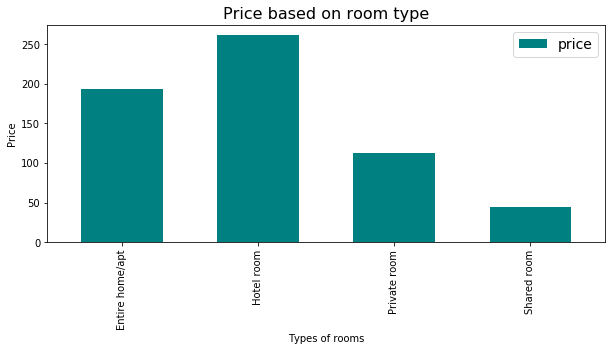

In [14]:
#plotting the above aspect
ax = price_per_room_type.plot(kind='bar', 
                figsize=(10, 4),
                color = ['teal'],
                width=.6,fontsize=10)
ax.set_title('Price based on room type',fontsize=16)
ax.legend(fontsize=14,facecolor = 'white') 
ax.set_xlabel('Types of rooms')
ax.set_ylabel('Price')
plt.show()

In [15]:
#calculating which room type of neighborhood has highest price ratings
neigh_and_room_price = df.groupby(['neighbourhood', 'room_type']).price.mean()
neigh_and_room_price

neighbourhood       room_type      
Albany Park         Entire home/apt    203.714286
                    Private room        50.583333
Archer Heights      Entire home/apt     99.500000
                    Private room       236.666667
Armour Square       Entire home/apt    225.347826
                    Private room        54.465116
Ashburn             Entire home/apt     80.000000
                    Private room        37.600000
Auburn Gresham      Entire home/apt    122.750000
                    Private room        62.500000
Austin              Entire home/apt    168.810811
                    Private room        53.730769
Avalon Park         Entire home/apt     70.000000
                    Private room        45.000000
Avondale            Entire home/apt    152.411290
                    Private room        61.574468
                    Shared room         44.800000
Belmont Cragin      Entire home/apt     89.866667
                    Private room        60.791667
              

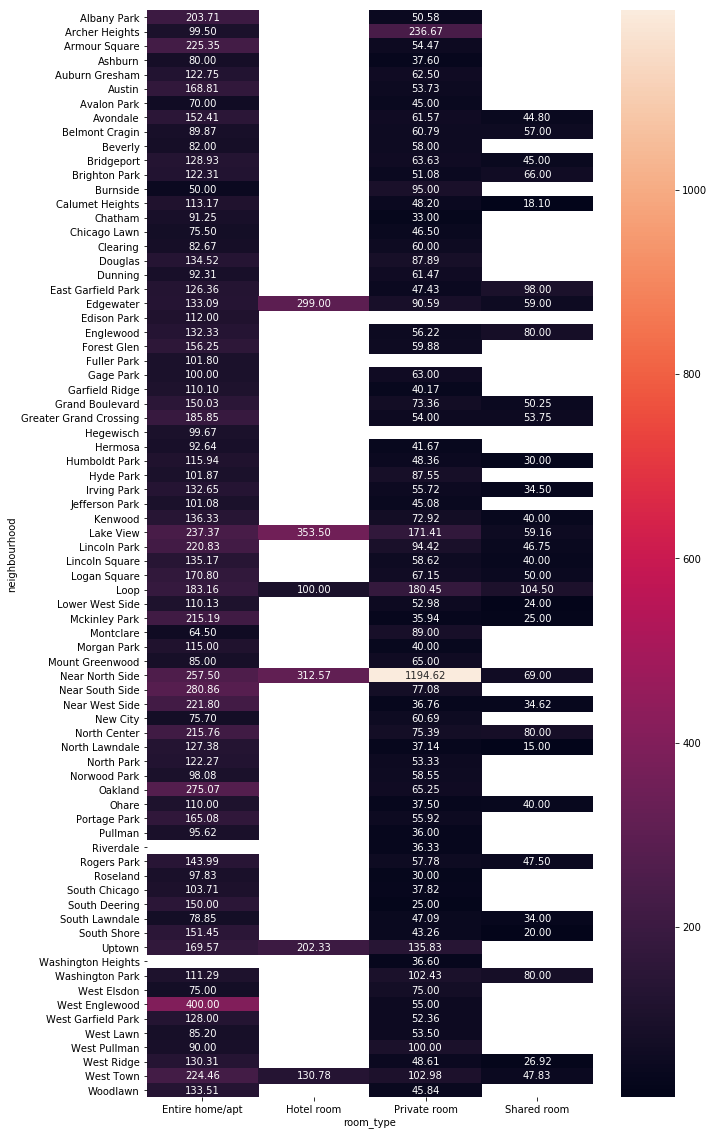

In [17]:
#plotting the neighborhood, room type and price
plt.figure(figsize=(10,20))
sns.heatmap(neigh_and_room_price.unstack(), annot=True, fmt=".2f")

# Importing Calendar csv
I am importing the calendar csv and it contains
1. Date column consisting of months.
2. Price and adjusted price column depicting same prices.
3. Minimum and maximum nights spend by people at seattle.

In [19]:

body = client_b90e9ac8e79b4097bb1a20c7435fdd53.get_object(Bucket='machinelearningproject-donotdelete-pr-y1ucldkwaptpzk',Key='calendar.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

calendar_df = pd.read_csv(body)
calendar_df.head()


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,145659,January,t,$390.00,$390.00,3.0,1125.0
1,126280,January,t,$38.00,$38.00,3.0,1125.0
2,145690,January,t,$427.00,$427.00,3.0,1125.0
3,166667,January,t,$125.00,$125.00,3.0,365.0
4,165952,January,t,$198.00,$198.00,3.0,365.0


# Cleaning data of Calendar data
1. Dropping the columns with no records.
2. Separating the unwanted strings from the columns and typecasting them.
3. Renaming the columns.

In [20]:
#dropping the column of 'available'
calendar_df.drop('available', axis=1, inplace=True)

In [39]:
#cleaning the price and ajusted price column and typcasting the columns of minimum nights and maximum nights
calendar_df['price'] = calendar_df['price'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(int)
calendar_df['adjusted_price'] = calendar_df['adjusted_price'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(int)
calendar_df[['minimum_nights', 'maximum_nights']] = calendar_df[['minimum_nights', 'maximum_nights']].apply(fill_mean, axis=0).astype(int)

In [40]:
#Renaming the date column to month
calendar_df.rename(columns={'date':'month'}, inplace=True)
calendar_df

,listing_id,month,price,adjusted_price,minimum_nights,maximum_nights
0,145659,January,390,390,3,1125
1,126280,January,38,38,3,1125
2,145690,January,427,427,3,1125
3,166667,January,125,125,3,365
4,165952,January,198,198,3,365
5,166706,January,280,280,3,365
6,172616,January,62,62,7,60
7,175511,January,69,69,4,1125
8,184764,January,85,85,3,1460
9,198135,January,41,41,2,1125


# Analyzing calendar data
Analyzing the data to find out insights of the above questions-
1. Finding out price ratings monthwise.
2. Calculating the maximum listings registered across the year.
3. Checking the maximum and minimum nights spend by people

In [41]:
#Finding the average of all the columns according to months
df_mon=calendar_df.groupby(['month']).mean()
df_mon.sort_values(['month'],ascending=True, axis=0)

,listing_id,price,adjusted_price,minimum_nights,maximum_nights
month,,,,,
April,1.366907e+07,165.209273,164.847505,6.465750,808.197075
August,1.367508e+07,165.367211,165.463187,6.591244,808.096189
December,1.366907e+07,158.238925,158.198446,6.491194,807.971830
February,1.366907e+07,154.336935,153.999913,6.475005,807.868036
January,1.366907e+07,154.257582,153.918411,6.502246,807.868396
July,1.367613e+07,163.120345,163.485117,6.615709,808.119054
June,1.367638e+07,153.341896,153.672810,6.685034,807.739916
March,1.366907e+07,158.067077,157.715720,6.465731,808.197075
May,1.367148e+07,162.299562,161.762577,6.632462,807.306364


In [43]:
#arranging the months column sequentially
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

df1 = df_mon.reindex(new_order, axis=0)
df1=df1.reset_index()
df1

,month,listing_id,price,adjusted_price,minimum_nights,maximum_nights
0,January,1.366907e+07,154.257582,153.918411,6.502246,807.868396
1,February,1.366907e+07,154.336935,153.999913,6.475005,807.868036
2,March,1.366907e+07,158.067077,157.715720,6.465731,808.197075
3,April,1.366907e+07,165.209273,164.847505,6.465750,808.197075
4,May,1.367148e+07,162.299562,161.762577,6.632462,807.306364
5,June,1.367638e+07,153.341896,153.672810,6.685034,807.739916
6,July,1.367613e+07,163.120345,163.485117,6.615709,808.119054
7,August,1.367508e+07,165.367211,165.463187,6.591244,808.096189
8,September,1.367252e+07,162.086507,162.082829,6.505465,808.070751
9,October,1.367241e+07,164.443545,164.432575,6.560419,808.067504


# Visualizing Data
Visualizations based on above analysis

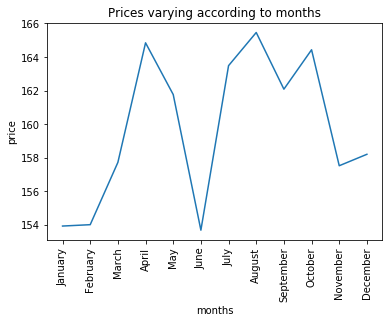

In [44]:
#Line plot of price variation according to month
x=df1['month']
y=df1['adjusted_price']
plt.plot(x, y)
plt.title('Prices varying according to months')
plt.xlabel('months')
plt.xticks(rotation=90)
plt.ylabel('price')
plt.show()

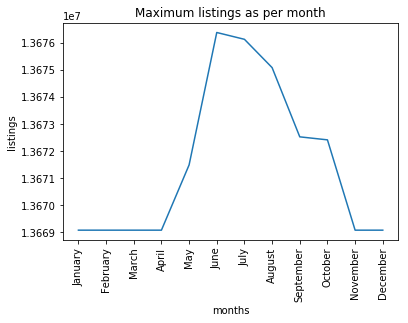

In [45]:
#Line plot of number of listings against months
x=df1['month']
y=df1['listing_id']
plt.plot(x, y)
plt.title('Maximum listings as per month')
plt.xlabel('months')
plt.xticks(rotation=90)
plt.ylabel('listings')
plt.show()

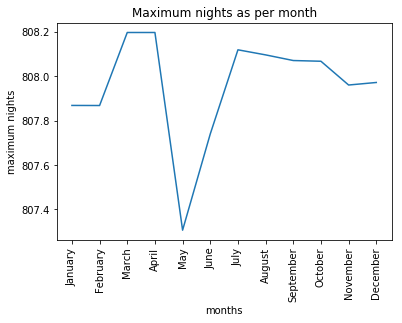

In [46]:
#Finding out which month accounts to maximum nights spent
x=df1['month']
y=df1['maximum_nights']
plt.plot(x, y)
plt.title('Maximum nights as per month')
plt.xlabel('months')
plt.xticks(rotation=90)
plt.ylabel('maximum nights')
plt.show()

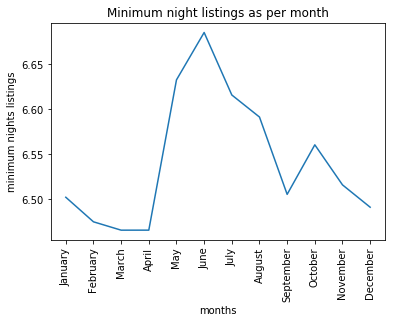

In [47]:
#finding out which months have minimum nights registered
x=df1['month']
y=df1['minimum_nights']
plt.plot(x, y)
plt.title('Minimum night listings as per month')
plt.xlabel('months')
plt.xticks(rotation=90)
plt.ylabel('minimum nights listings')
plt.show()